<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/NY_PCA_Analysis_SupersetData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal**

Dimensionality Reduction using PCA on NY Superset timeseries data


## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021'

 CA_alldatasets_Feb05.csv
 CA_alldatasets_Jan13.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb05.csv
 CA_CombinedData_Labeled_CDCGuideline_Feb06.csv
 CA_CombinedData_Labeled_CDCGuideline_Jan15.csv
 CA_combined_Feb04.csv
 CA_CovidDataJan10.csv
 CA_dataset_Feb11.csv
 CA_GoogleMobilityDataJan10.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb05.csv
 CA_MarylandData_Labeled_CDCGuideline_Feb06.csv
 CA_MarylandData_Labeled_CDCGuideline_Jan15.csv
 CA_processedMarylandData_Feb04.csv
 CA_processedMarylandData_Feb05.csv
 CA_processedMarylandData_Feb12.csv
 CA_processedMarylandData_Jan11.csv
 CA_SocialDistancingDataJan10.csv
 CA_socialDistancingInertiaData_Feb04.csv
 CA_Superset_dataset_Feb12.csv
 computed_CA_mobility_data.csv
 data-mask_for_all.csv
 election_results_2021.csv
 maryland_inertia_data_allstates_Feb04.csv
 maryland_inertia_data_allstates_Feb05.csv
 maryland_inertia_data_allstates_Feb12.csv
 maryland_inertia_data_allstates_Jan11.csv
 maryland_inertia_raw_dec28_2020.csv
 Mask_Rule_Feb05.cs

# Import library

In [2]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

import seaborn as sns


# Load Superset data

In [3]:
location = '/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/'
all_states_data = pd.read_csv(location+'AllStates_Superset_dataset_Mar26.csv', low_memory=False)
all_states_data.head(2)

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
0,2020-03-01,Alabama,1001,0,Autauga County,0.0,7.194,49,15.0,13.0,0.0,0.0,3.0,0.0,35.853419,Alabama,35,22,2.81,41.6,1.0,32.9,0.26,2.55,0,55601,-1.2,0.11,19,58786,19.0,2.8,48.68,19,101,3.79,0.33,0.025,0.0,0.0,37,47.1,0.0,0.0,0.0,0,0,0.0,28,0.4,3.5,3.2,0.3,0.0,0.0,0.0
1,2020-03-02,Alabama,1001,0,Autauga County,0.0,14.587,100,15.0,4.0,0.0,0.0,5.0,-1.0,35.853419,Alabama,11,13,3.33,40.9,0.5,42.0,0.80,2.53,0,55601,-1.9,0.11,19,58786,19.0,2.8,48.68,19,101,3.79,0.33,0.025,0.0,0.0,38,47.1,0.0,0.0,0.0,0,0,0.0,28,0.4,3.5,3.2,0.3,0.0,0.0,0.0


In [4]:
CA_superset_data = all_states_data[all_states_data['Province_State'] == 'New York']
CA_superset_data.head()

,Date,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
28536,2020-03-01,New York,36033,0,Franklin County,0.0,2.205,56,28.0,27.0,0.0,0.0,7.0,0.0,12.013337,New York,34,26,3.66,25.5,1.1,41.1,0.63,3.03,0,50293,-14.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,37,63.5,0.0,0.00,0.0,0,0,0.00,28,0.7,4.5,4.2,0.8,0.0,0.0,31.556174
28537,2020-03-02,New York,36033,0,Franklin County,0.0,5.216,134,12.0,21.0,0.0,0.0,4.0,0.0,12.013337,New York,15,18,4.48,21.0,0.6,47.2,1.05,3.44,0,50293,-3.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,38,63.5,0.0,0.00,0.0,0,0,0.01,28,0.7,4.5,4.2,0.8,0.0,0.0,26.044179
28538,2020-03-03,New York,36033,0,Franklin County,0.0,3.885,100,16.0,21.0,0.0,0.0,1.0,-1.0,12.013337,New York,13,17,4.76,23.8,0.6,50.6,1.08,3.68,0,50293,3.5,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,39,63.5,0.0,0.00,0.0,0,0,0.01,35,0.7,4.5,4.2,0.8,0.0,0.0,17.913985
28539,2020-03-04,New York,36033,0,Franklin County,0.0,3.588,92,9.0,5.0,0.0,0.0,3.0,0.0,12.013337,New York,21,22,4.35,21.0,0.7,50.3,0.99,3.37,0,50293,-5.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,40,63.5,11.1,0.00,0.0,0,0,0.04,35,0.7,4.5,4.2,0.8,0.0,0.0,12.677590
28540,2020-03-05,New York,36033,0,Franklin County,0.0,3.847,99,10.0,11.0,0.0,0.0,3.0,0.0,12.013337,New York,13,17,4.63,23.1,0.8,55.5,1.10,3.53,0,50293,-0.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,41,63.5,22.4,0.01,0.0,0,0,0.05,35,0.7,4.5,4.2,0.8,0.0,0.0,7.578994


In [5]:
CA_superset_data['growth_code'] = CA_superset_data['growth_label'].astype('category').cat.codes
CA_superset_data.head(2)

KeyError: ignored

In [6]:
print(CA_superset_data.shape)
print(CA_superset_data.Date.min())
print(CA_superset_data.Date.max())


(17258, 56)
2020-03-01
2020-12-28


## Factor Plot

In [7]:
df_superset_data_filtered1 = CA_superset_data[(CA_superset_data['Date'] >= '2020-04-01') & (CA_superset_data['Date'] < '2020-07-01')]
print(df_superset_data_filtered1.shape)


(5340, 56)


In [8]:
sns.factorplot(data = df_superset_data_filtered1, x = 'New.cases.1000.people', y = "m50_index", 
               #col = 'Promo', 
               row = 'FIPS',
               hue = 'FIPS',
               palette = 'RdPu') 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fdd43cb5950> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdd43cbe440> (for post_execute):


KeyboardInterrupt: ignored

## Preprocessing: Convert 'date' as index column before applying PCA

In [9]:
CA_superset_data['Date'] = pd.to_datetime(CA_superset_data['Date'], format='%Y-%m-%d') 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
CA_superset_data = CA_superset_data.set_index('Date')
CA_superset_data.head()

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,New York,36033,0,Franklin County,0.0,2.205,56,28.0,27.0,0.0,0.0,7.0,0.0,12.013337,New York,34,26,3.66,25.5,1.1,41.1,0.63,3.03,0,50293,-14.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,37,63.5,0.0,0.00,0.0,0,0,0.00,28,0.7,4.5,4.2,0.8,0.0,0.0,31.556174
2020-03-02,New York,36033,0,Franklin County,0.0,5.216,134,12.0,21.0,0.0,0.0,4.0,0.0,12.013337,New York,15,18,4.48,21.0,0.6,47.2,1.05,3.44,0,50293,-3.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,38,63.5,0.0,0.00,0.0,0,0,0.01,28,0.7,4.5,4.2,0.8,0.0,0.0,26.044179
2020-03-03,New York,36033,0,Franklin County,0.0,3.885,100,16.0,21.0,0.0,0.0,1.0,-1.0,12.013337,New York,13,17,4.76,23.8,0.6,50.6,1.08,3.68,0,50293,3.5,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,39,63.5,0.0,0.00,0.0,0,0,0.01,35,0.7,4.5,4.2,0.8,0.0,0.0,17.913985
2020-03-04,New York,36033,0,Franklin County,0.0,3.588,92,9.0,5.0,0.0,0.0,3.0,0.0,12.013337,New York,21,22,4.35,21.0,0.7,50.3,0.99,3.37,0,50293,-5.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,40,63.5,11.1,0.00,0.0,0,0,0.04,35,0.7,4.5,4.2,0.8,0.0,0.0,12.677590
2020-03-05,New York,36033,0,Franklin County,0.0,3.847,99,10.0,11.0,0.0,0.0,3.0,0.0,12.013337,New York,13,17,4.63,23.1,0.8,55.5,1.10,3.53,0,50293,-0.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,41,63.5,22.4,0.01,0.0,0,0,0.05,35,0.7,4.5,4.2,0.8,0.0,0.0,7.578994


## Group the data

In [11]:
CA_superset_data.columns

Index(['Province_State', 'FIPS', 'New cases', 'County Name',
       'mask_rule_severity', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'PopDensity', 'State_Name',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Employment.density',
       'X..hot.spots.1000.people', 'Hospital.beds.1000.people',
       'ICUs.1000.people', 'X..contact.tracing.wo

In [19]:
x_col_demographics = ['FIPS','PopDensity','X..people.older.than.60',
                      'Median.income', 'X..African.Americans',
                      'X..Hispanic.Americans', 'X..Male','New Cases/100k population']

In [37]:
#['growth_code', 'positivity_rate']
x_col_hospitalization_testing = ['Hospital.beds.1000.people',
       'ICUs.1000.people', 
       'X..hospital.bed.utilization',
       'Testing.capacity', 'Tests.done.1000.people', 'X..ICU.utilization',
       'Ventilator.shortage',#'positivity_rate',
       'rolling_avg_new_cases/100k'	#,'growth_code'
       ,'New Cases/100k population'] #'X..contact.tracing.workers.1000.people',

In [21]:
x_col_mobility = ['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'X..staying.home', 'Trips.person', 'X..out.of.county.trips',
       'X..out.of.state.trips', 'Miles.person', 'Work.trips.person',
       'Non.work.trips.person','X..working.from.home','New Cases/100k population']

In [22]:
x_col_socialdistancing = ['m50', 'm50_index','Social.distancing.index','New Cases/100k population']

In [23]:
x_col_maskrule = ['mask_rule_severity','New Cases/100k population']

# PCA: Demographic Group

In [25]:
CA_superset_data_filtered = CA_superset_data[x_col_demographics]
CA_superset_data_filtered.head()

,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New Cases/100k population
Date,,,,,,,,
2020-03-01,36033,12.013337,23,51696,5.8,3.5,54.87,0.0
2020-03-02,36033,12.013337,23,51696,5.8,3.5,54.87,0.0
2020-03-03,36033,12.013337,23,51696,5.8,3.5,54.87,0.0
2020-03-04,36033,12.013337,23,51696,5.8,3.5,54.87,0.0
2020-03-05,36033,12.013337,23,51696,5.8,3.5,54.87,0.0


In [26]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(17258, 8)
(17258, 8)


## Correlation Plot

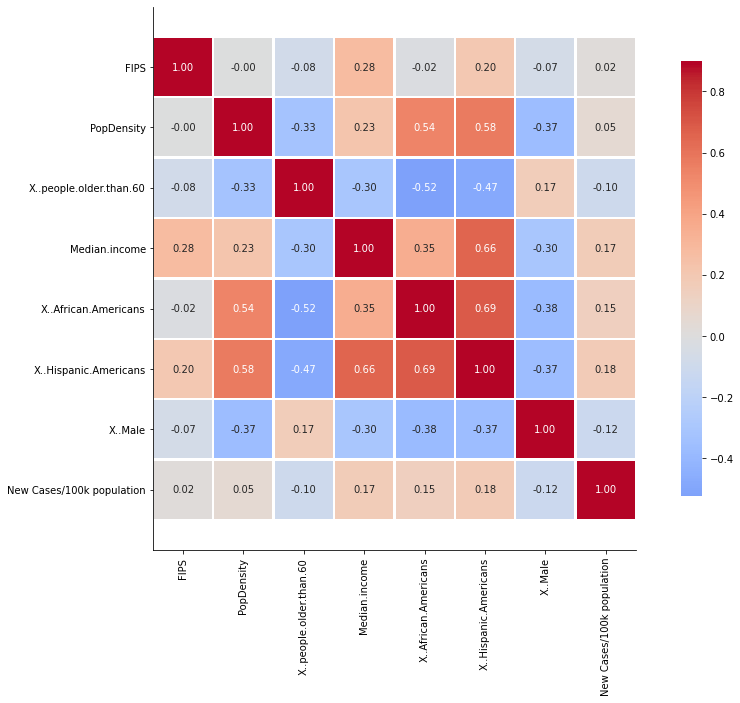

In [27]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [28]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [29]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

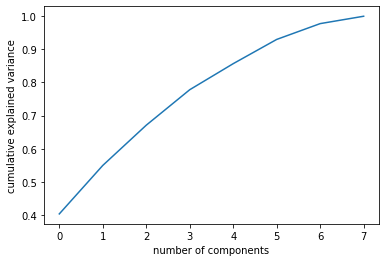

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [31]:
num_components = 6
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [32]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,PopDensity,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,New Cases/100k population
0,0.112092,0.384679,-0.354428,0.373809,0.453449,0.500549,-0.313224,0.140818
1,0.769457,-0.330051,0.098020,0.426546,-0.266914,0.077717,0.076133,0.156123
2,-0.266800,-0.157002,0.073918,0.007399,-0.012547,-0.055954,-0.045783,0.945127
3,-0.030318,-0.171970,-0.613178,-0.020517,0.130687,0.059181,0.754805,0.052793
4,-0.544860,-0.355991,0.196615,0.668343,-0.040680,0.185929,0.082688,-0.219081
5,0.031491,0.552964,0.552513,0.047364,-0.022031,0.262356,0.553683,0.099224


In [33]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [34]:
most_important_names

['X..Hispanic.Americans',
 'FIPS',
 'New Cases/100k population',
 'X..Male',
 'Median.income',
 'X..Male']

In [35]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['FIPS', 'PopDensity', 'X..people.older.than.60', 'Median.income',
       'X..African.Americans', 'X..Hispanic.Americans', 'X..Male',
       'New Cases/100k population'],
      dtype='object')
most_important_names:  ['X..Hispanic.Americans', 'FIPS', 'New Cases/100k population', 'X..Male', 'Median.income', 'X..Male']
2


# PCA: Hospitalization and testing  Group

In [38]:
CA_superset_data_filtered = CA_superset_data[x_col_hospitalization_testing]
CA_superset_data_filtered.head()

,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,rolling_avg_new_cases/100k,New Cases/100k population
Date,,,,,,,,,
2020-03-01,2.74,0.22,63.5,0.0,0.00,0.0,0,31.556174,0.0
2020-03-02,2.74,0.22,63.5,0.0,0.00,0.0,0,26.044179,0.0
2020-03-03,2.74,0.22,63.5,0.0,0.00,0.0,0,17.913985,0.0
2020-03-04,2.74,0.22,63.5,11.1,0.00,0.0,0,12.677590,0.0
2020-03-05,2.74,0.22,63.5,22.4,0.01,0.0,0,7.578994,0.0


In [39]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(17258, 9)
(17258, 9)


## Correlation Plot

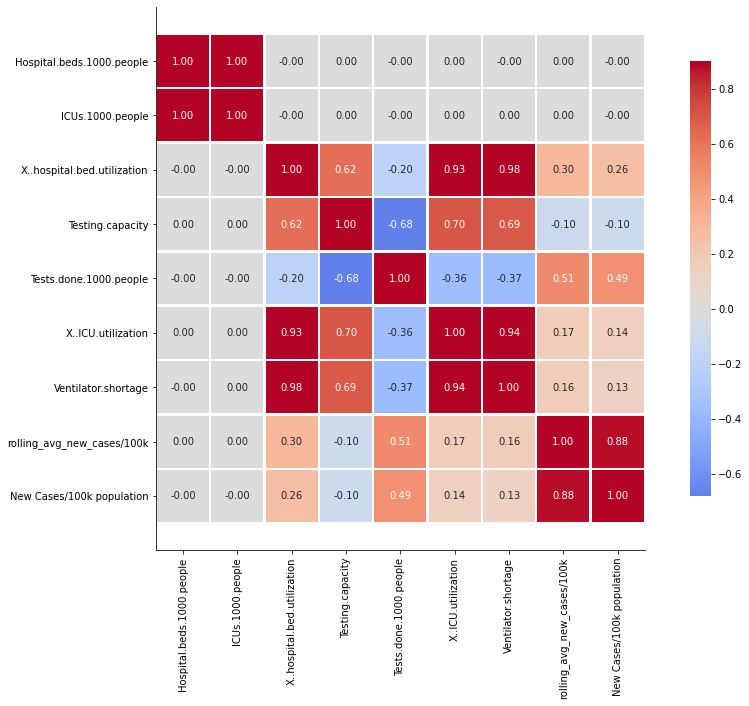

In [40]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [41]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [42]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

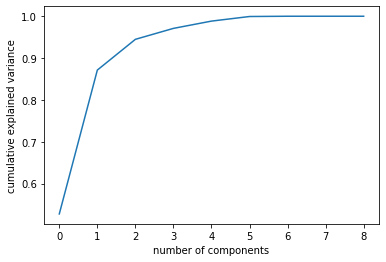

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [49]:
num_components = 5
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [50]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,Hospital.beds.1000.people,ICUs.1000.people,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,rolling_avg_new_cases/100k,New Cases/100k population
0,-0.0,-0.000000e+00,0.486322,0.432837,-0.258865,0.497880,0.503492,0.067419,0.056548
1,0.0,-4.163336e-17,0.159687,-0.191444,0.469181,0.054576,0.050587,0.600785,0.592653
2,0.0,1.229146e-16,-0.325195,0.485932,-0.539373,-0.207870,-0.261661,0.308109,0.400733
3,0.0,3.262052e-16,0.009852,-0.732684,-0.628096,0.101076,0.169546,0.081415,0.151595
4,0.0,1.699351e-16,0.006506,0.008845,0.071297,-0.000594,0.044601,-0.728677,0.679585


In [51]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [52]:
most_important_names

['Ventilator.shortage',
 'rolling_avg_new_cases/100k',
 'Tests.done.1000.people',
 'Testing.capacity',
 'rolling_avg_new_cases/100k']

In [53]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'rolling_avg_new_cases/100k', 'New Cases/100k population'],
      dtype='object')
most_important_names:  ['Ventilator.shortage', 'rolling_avg_new_cases/100k', 'Tests.done.1000.people', 'Testing.capacity', 'rolling_avg_new_cases/100k']
4


# PCA: Mobility Group

In [54]:
CA_superset_data_filtered = CA_superset_data[x_col_mobility]
CA_superset_data_filtered.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New Cases/100k population
Date,,,,,,,,,,,,,,,
2020-03-01,28.0,27.0,0.0,0.0,7.0,0.0,26,3.66,25.5,1.1,41.1,0.63,3.03,4.2,0.0
2020-03-02,12.0,21.0,0.0,0.0,4.0,0.0,18,4.48,21.0,0.6,47.2,1.05,3.44,4.2,0.0
2020-03-03,16.0,21.0,0.0,0.0,1.0,-1.0,17,4.76,23.8,0.6,50.6,1.08,3.68,4.2,0.0
2020-03-04,9.0,5.0,0.0,0.0,3.0,0.0,22,4.35,21.0,0.7,50.3,0.99,3.37,4.2,0.0
2020-03-05,10.0,11.0,0.0,0.0,3.0,0.0,17,4.63,23.1,0.8,55.5,1.10,3.53,4.2,0.0


In [55]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(17258, 15)
(17258, 15)


## Correlation Plot

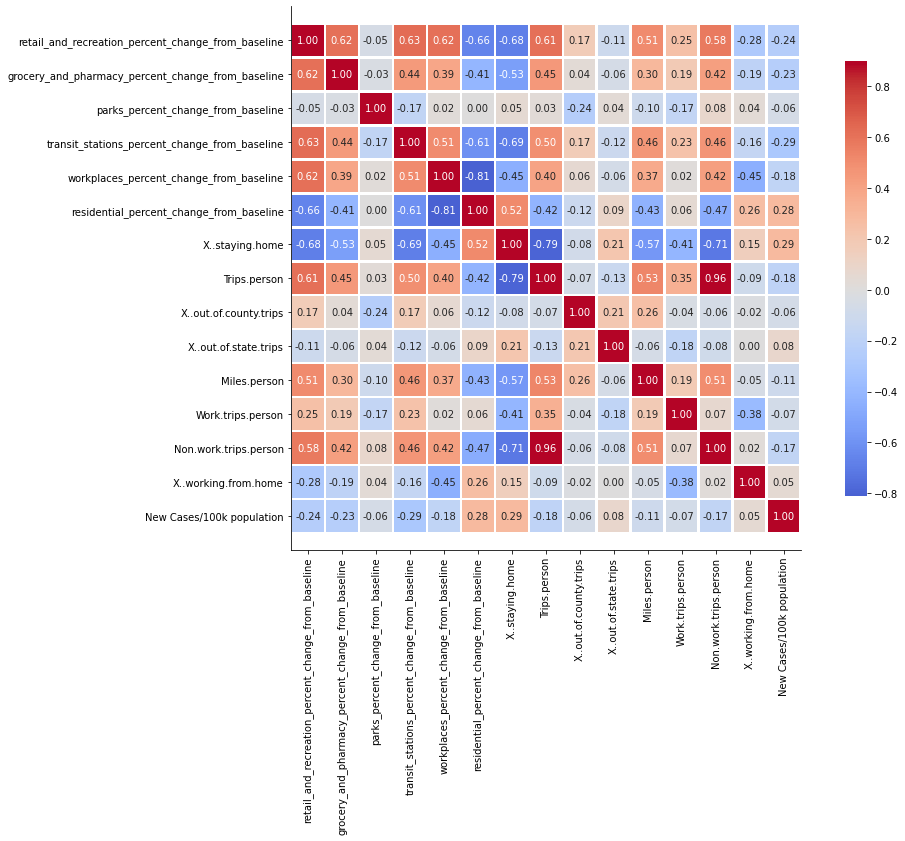

In [56]:

corr = CA_superset_data_filtered.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Standardizing the data

In [57]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [58]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

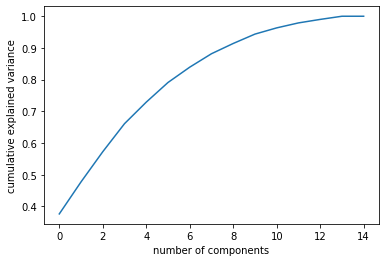

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [60]:
num_components = 12
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [61]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..working.from.home,New Cases/100k population
0,-0.361405,-0.273940,0.025830,-0.324586,-0.298218,0.317403,0.368739,-0.344134,-0.051100,0.071973,-0.276935,-0.134000,-0.325517,0.123795,0.143240
1,0.100721,0.013500,-0.309088,0.128294,0.274141,-0.241685,0.164066,-0.352107,0.514365,0.289010,0.023778,-0.095917,-0.345475,-0.338963,-0.033230
2,0.008599,-0.016561,0.366474,-0.028728,0.165535,-0.260524,0.112157,-0.004022,0.062426,0.285635,0.039019,-0.696807,0.205492,0.370402,-0.068423
3,0.029613,0.061930,0.406310,-0.084753,0.354350,-0.217647,0.126710,-0.130032,-0.469239,-0.168309,-0.327983,-0.010991,-0.134936,-0.480331,-0.109479
4,0.032772,-0.003831,0.187112,-0.194443,0.064660,0.120149,0.021661,0.206078,-0.028504,0.569034,0.109166,0.146357,0.175055,-0.302620,0.619972
5,0.001348,-0.213127,-0.340369,0.026133,0.239029,-0.215858,0.066856,-0.038212,-0.155019,-0.477260,0.120222,-0.243471,0.032604,0.071649,0.629798
6,0.091508,0.569672,-0.488584,0.064657,-0.047219,0.026887,0.051902,0.006955,-0.346383,0.262006,-0.426642,-0.153709,0.053725,0.130560,0.065573
7,0.249402,0.609563,0.379504,-0.105498,-0.134660,0.105797,0.002122,-0.193283,0.305484,-0.318302,0.050414,-0.012165,-0.201871,0.104480,0.308861
8,0.011538,-0.110128,0.227541,0.664448,-0.053878,-0.098957,-0.126527,-0.243572,-0.270767,0.226871,0.039922,0.213046,-0.323185,0.296039,0.206362
9,-0.049640,0.223099,-0.119321,-0.251759,0.018278,-0.010821,0.144516,-0.178437,-0.411906,0.107897,0.755026,-0.006132,-0.187745,0.015450,-0.173407


In [62]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [63]:
most_important_names

['X..staying.home',
 'X..out.of.county.trips',
 'Work.trips.person',
 'X..working.from.home',
 'New Cases/100k population',
 'New Cases/100k population',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'Miles.person',
 'retail_and_recreation_percent_change_from_baseline',
 'retail_and_recreation_percent_change_from_baseline']

In [64]:
print(" initial_feature_names : ",initial_feature_names)

print("most_important_names: ", most_important_names)

print(len(initial_feature_names) - len(most_important_names))

 initial_feature_names :  Index(['retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'X..staying.home',
       'Trips.person', 'X..out.of.county.trips', 'X..out.of.state.trips',
       'Miles.person', 'Work.trips.person', 'Non.work.trips.person',
       'X..working.from.home', 'New Cases/100k population'],
      dtype='object')
most_important_names:  ['X..staying.home', 'X..out.of.county.trips', 'Work.trips.person', 'X..working.from.home', 'New Cases/100k population', 'New Cases/100k population', 'grocery_and_pharmacy_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'Miles.person', 'retail_and_recreation_percent_change_from_baseline', 'retail_a

# Conclusion for superset dataset analysis:

From the above PCA analysis, we can drop the following columns from Time-series forecasting

1. Demographic Group:
>* 'X..people.older.than.60', 
>* 'Median.income', 
>* 'X..Male', 
>* 'New cases/100k',
>* 'FIPS', 
>* 'X..African.Americans', 
>* 'PopDensity'

2. Hospitalization and testing Group:
>* 'X..hospital.bed.utilization',
>* 'positivity_rate',
>* 'Ventilator.shortage',
>* 'positivity_rate',
>* 'Testing.capacity',
>* 'growth_code',
>* 'rolling_avg_new_cases/100k'

3. Mobility Group:
>* 'retail_and_recreation_percent_change_from_baseline',
>* 'Trips.person',
>* 'X..working.from.home',
>* 'parks_percent_change_from_baseline',
>* 'X..out.of.county.trips',
>* 'New cases/100k',
>* 'X..out.of.state.trips',
>* 'X..working.from.home',
>* 'Miles.person',
>* 'grocery_and_pharmacy_percent_change_from_baseline',
>* 'transit_stations_percent_change_from_baseline',
>* 'retail_and_recreation_percent_change_from_baseline'

# Applying for the whole dataset

## Standardizing the data

In [65]:
CA_superset_data.head(2)

,Province_State,FIPS,New cases,County Name,mask_rule_severity,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,State_Name,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,New York,36033,0,Franklin County,0.0,2.205,56,28.0,27.0,0.0,0.0,7.0,0.0,12.013337,New York,34,26,3.66,25.5,1.1,41.1,0.63,3.03,0,50293,-14.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,37,63.5,0.0,0.0,0.0,0,0,0.00,28,0.7,4.5,4.2,0.8,0.0,0.0,31.556174
2020-03-02,New York,36033,0,Franklin County,0.0,5.216,134,12.0,21.0,0.0,0.0,4.0,0.0,12.013337,New York,15,18,4.48,21.0,0.6,47.2,1.05,3.44,0,50293,-3.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.029,0.0,0.0,38,63.5,0.0,0.0,0.0,0,0,0.01,28,0.7,4.5,4.2,0.8,0.0,0.0,26.044179


In [71]:
numeric_cols = ['FIPS','mask_rule_severity','m50_index','retail_and_recreation_percent_change_from_baseline',
                'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                'residential_percent_change_from_baseline','PopDensity','Social.distancing.index',
                'X..staying.home','Trips.person','X..out.of.county.trips',	'X..out.of.state.trips',
                'Miles.person',	'Work.trips.person','Non.work.trips.person','X..change.in.consumption',
                'Transit.mode.share','X..people.older.than.60',	'Median.income',	'X..African.Americans',
                'X..Hispanic.Americans',	'X..Male','Employment.density',	'X..hot.spots.1000.people',
                'Hospital.beds.1000.people',	'ICUs.1000.people',
                'New.cases.1000.people',	'Active.cases.1000.people',	'X.days..decreasing.COVID.cases',
                'X..hospital.bed.utilization',	'Testing.capacity',	'Tests.done.1000.people',	'X..ICU.utilization',
                'Ventilator.shortage',	'Imported.COVID.cases',	'COVID.exposure.1000.people',	'X.days..decreasing.ILI.cases',
                'Unemployment.claims.1000.people',	'Unemployment.rate',	'X..working.from.home',
                'Cumulative.inflation.rate'	,'COVID.death.rate' ,#'growth_code',
                #'New cases/100k',	'positivity_rate',	
                'New Cases/100k population',
                'rolling_avg_new_cases/100k']

In [72]:
CA_superset_data_filtered = CA_superset_data[numeric_cols]

In [73]:
CA_superset_data_filtered.head(2)

,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-01,36033,0.0,56,28.0,27.0,0.0,0.0,7.0,0.0,12.013337,34,26,3.66,25.5,1.1,41.1,0.63,3.03,-14.8,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.0,0.0,37,63.5,0.0,0.0,0.0,0,0,0.00,28,0.7,4.5,4.2,0.8,0.0,0.0,31.556174
2020-03-02,36033,0.0,134,12.0,21.0,0.0,0.0,4.0,0.0,12.013337,15,18,4.48,21.0,0.6,47.2,1.05,3.44,-3.3,0.99,23,51696,5.8,3.5,54.87,12,114,2.74,0.22,0.0,0.0,38,63.5,0.0,0.0,0.0,0,0,0.01,28,0.7,4.5,4.2,0.8,0.0,0.0,26.044179


In [74]:
print(CA_superset_data_filtered.shape)
CA_superset_data_filtered = CA_superset_data_filtered.dropna()
print(CA_superset_data_filtered.shape)

(17258, 47)
(17258, 47)


In [75]:
X = CA_superset_data_filtered.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

## Apply PCA

In [76]:
pca = PCA()
X_pca = pca.fit(X_std)

## Determine the number of components

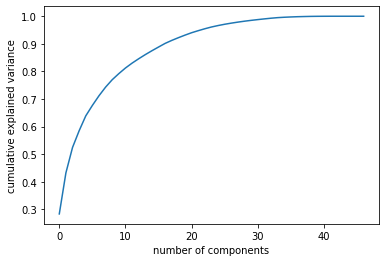

In [77]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Dimensionality Reduction

In [78]:
num_components = 30
pca = PCA(num_components)  
X_pca = pca.fit_transform(X_std) # fit and reduce dimension

## Important feature set

In [79]:
pd.DataFrame(pca.components_, columns = CA_superset_data_filtered.columns)


,FIPS,mask_rule_severity,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,PopDensity,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,X..change.in.consumption,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k
0,0.015147,6.938894e-18,-0.207108,-0.229755,-0.154754,0.008466,-0.198486,-0.183178,0.195857,0.140863,0.251571,0.239872,-0.234471,-0.021960,0.045382,-0.187679,-0.084239,-0.223906,-0.208772,0.155622,-0.087713,0.102873,0.134647,0.141926,-0.103023,0.114999,0.089661,0.000000e+00,0.000000e+00,0.097983,0.149805,0.053878,0.194793,0.149262,-0.071879,0.199036,0.193841,0.151942,-0.074536,-0.125728,0.181350,0.075628,0.065127,-0.173878,0.105484,0.083051,0.093837
1,0.028212,-2.220446e-16,0.032772,-0.018982,-0.081890,0.066261,-0.128759,0.014867,0.022894,0.221649,0.049720,0.152659,-0.013909,0.016161,0.116547,0.014621,-0.084582,0.010713,0.071854,0.239720,-0.135030,0.164862,0.201095,0.229584,-0.148621,0.184977,0.145599,0.000000e+00,0.000000e+00,0.134991,-0.082683,0.059226,-0.194257,-0.245382,0.232192,-0.230062,-0.223797,0.152688,0.228710,0.187080,-0.229155,-0.139321,-0.035851,0.250811,-0.184553,0.119921,0.124954
2,-0.023150,-3.330669e-16,-0.041520,-0.021046,-0.080436,-0.107286,0.008330,-0.043173,0.052558,-0.167443,-0.009322,-0.044165,0.030156,-0.031354,-0.069716,0.048533,0.024269,0.024709,-0.019829,-0.176340,0.080491,-0.072862,-0.133835,-0.141833,0.085052,-0.131744,-0.094365,-0.000000e+00,-0.000000e+00,0.311607,0.323860,-0.208106,0.171391,-0.109229,0.341065,0.100272,0.088997,0.044702,0.339664,0.022908,-0.014961,-0.035713,0.112852,0.037485,-0.054258,0.358290,0.365637
3,-0.019643,0.000000e+00,-0.010137,0.068527,0.020659,-0.159200,0.064403,0.194472,-0.085434,0.025693,0.026310,0.033993,-0.136683,0.039702,-0.033836,-0.044961,0.263382,-0.224634,-0.237128,0.001069,0.057039,-0.082137,-0.043228,-0.046323,0.021024,0.029089,0.006295,0.000000e+00,0.000000e+00,0.079271,-0.031151,0.130836,0.025045,0.159763,-0.010842,-0.043447,0.008690,-0.025115,-0.064375,-0.187056,-0.042682,-0.448298,-0.503824,-0.072300,-0.362124,0.083692,0.100376
4,0.000785,-8.456777e-17,0.032587,0.042984,-0.018073,-0.299943,0.144708,0.023115,-0.113259,0.232858,0.000287,0.024845,-0.108309,0.440707,0.171198,0.137721,-0.096660,-0.086048,-0.011887,0.012109,0.314641,-0.081855,-0.264834,-0.101311,0.033854,0.368347,0.385276,0.000000e+00,-1.880791e-37,0.073806,0.032294,-0.184831,0.017241,-0.021800,0.012551,0.026463,0.015536,0.021345,0.022658,0.026537,0.013255,0.084941,0.088054,0.002597,0.067811,-0.071844,-0.076932
5,0.172616,-2.949030e-17,0.150148,0.112304,0.246904,0.019946,-0.012245,-0.002941,0.078232,0.041312,-0.211730,-0.140706,0.229225,0.145251,0.226465,0.105807,0.146529,0.199656,0.205794,0.077504,-0.043632,0.237941,0.015997,0.211617,0.005279,0.047041,0.061042,-1.479114e-31,-6.162976e-33,0.183462,0.155933,0.125802,0.026537,0.154245,-0.114864,0.064029,0.004730,0.200253,-0.067683,-0.305949,-0.081767,0.139322,-0.186064,-0.196692,0.148784,0.178669,0.195891
6,0.414859,-2.602085e-17,-0.224084,0.072556,0.000780,0.290635,0.050868,0.249822,-0.214962,-0.233079,0.153494,0.004899,-0.115970,0.172116,0.240203,-0.094064,

In [80]:

n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = CA_superset_data_filtered.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [81]:
most_important_names

['Social.distancing.index',
 'Cumulative.inflation.rate',
 'rolling_avg_new_cases/100k',
 'X..working.from.home',
 'X..out.of.county.trips',
 'X.days..decreasing.ILI.cases',
 'FIPS',
 'Work.trips.person',
 'FIPS',
 'FIPS',
 'X..out.of.state.trips',
 'X..change.in.consumption',
 'New.cases.1000.people',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'Miles.person',
 'X..Male',
 'X.days..decreasing.COVID.cases',
 'X.days..decreasing.ILI.cases',
 'X..out.of.county.trips',
 'Imported.COVID.cases',
 'm50_index',
 'X..African.Americans',
 'Work.trips.person',
 'transit_stations_percent_change_from_baseline',
 'retail_and_recreation_percent_change_from_baseline',
 'New.cases.1000.people',
 'Testing.capacity',
 'X..African.Americans',
 'residential_percent_change_from_baseline',
 'X..Hispanic.Americans']

## Conclusion


>* 'Tests.done.1000.people',
>* 'X..staying.home',
>* 'Unemployment.rate',
>* 'X..people.older.than.60',
>* 'X..working.from.home',
>* 'X.days..decreasing.ILI.cases',
>* 'X..Male',
>* 'positivity_rate',
>* 'X..out.of.county.trips',
>* 'positivity_rate',
>* 'parks_percent_change_from_baseline',
>* 'Work.trips.person',
>* 'm50_index',
>* 'FIPS',
>* 'positivity_rate',
>* 'positivity_rate',
>* 'Imported.COVID.cases',
>* 'X..out.of.state.trips',
>* 'positivity_rate',
>* 'Miles.person',
>* 'X.days..decreasing.COVID.cases',
>* 'grocery_and_pharmacy_percent_change_from_baseline',
>* 'New cases/100k',
>* 'transit_stations_percent_change_from_baseline',
>* 'transit_stations_percent_change_from_baseline',
>* 'Testing.capacity',
>* 'retail_and_recreation_percent_change_from_baseline',
>* 'Unemployment.claims.1000.people',
>* 'growth_code'

# Reference

* https://medium.com/@ansjin/dimensionality-reduction-using-pca-on-multivariate-timeseries-data-b5cc07238dc4